# Data exploration

From a big database, we will do some data exploration.

In [1]:
import requests
import json
from math import *
import numpy as np
import pandas as pd
#import tensorflow as tf
import time
import collections
import os
import timeit
%matplotlib inline 
import matplotlib.pyplot as plt

# load the database

from IPython.display import display

folder = os.path.join('videos_data_random', 'youtube_fame')
videos_database = pd.read_sql('videos', 'sqlite:///' + os.path.join(folder, 'videos.sqlite'))

print('finish')

finish


In [2]:
#extract the data we need from the database

limit = len(videos_database['viewCount'])

listViewCount = np.zeros(limit)
ratio_like_dislike = np.zeros(limit)
commentCount = np.zeros(limit)
ratio_views_subs = np.zeros(limit)
subsCount = np.zeros(limit)
for i in range(limit):
    listViewCount[i]=int(videos_database['viewCount'][i])
    if float(videos_database['dislikeCount'][i])==0:
        ratio_like_dislike[i] = float(videos_database['likeCount'][i])/float(1)       
    else:
        ratio_like_dislike[i] = float(videos_database['likeCount'][i])/float(videos_database['dislikeCount'][i])
    if float(videos_database['subsCount'][i])==0:
        ratio_views_subs[i] = float(videos_database['viewCount'][i])/float(1)       
    else:
        ratio_views_subs[i] = float(videos_database['viewCount'][i])/float(videos_database['subsCount'][i])
    commentCount[i] = int(videos_database['commentCount'][i])
    subsCount[i] = int(videos_database['subsCount'][i])
    



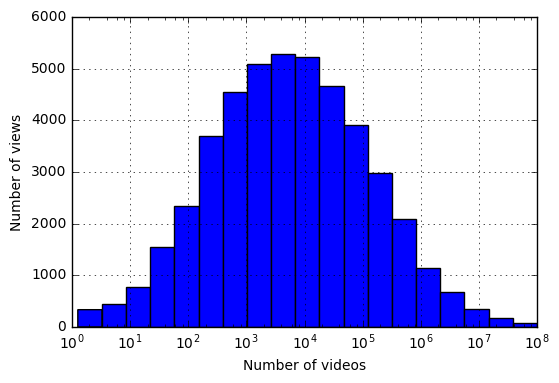

In [3]:
plt.figure(2)

val = np.asarray(videos_database['viewCount'])
plt.xlabel('Number of videos')
plt.ylabel('Number of views')
plt.grid(True)
plt.hist(listViewCount, bins=np.logspace(0.1, 8, 20))
plt.gca().set_xscale("log")
#plt.yscale('log')
plt.show()


**I/ Views of a video**

Based on the classes that will be used for the exploitation algorithms, we computed the number of videos per range of views.
From the plots below (figures 1 and 2), we can see that for the first classes, with few views ([0-999],[1000-9999] and [10000-99999]), the number of videos for each class are slightly the same (between 11000 and 14000). Moreover these 3 classes represent 82% of the whole database. Videos with more than 10 million views are rare (less than 1% of the database)

In [4]:
nbr_video = len(videos_database['viewCount'])
nbr_label = 7
train_labels = np.zeros([nbr_video,nbr_label])
nbvid_lab = np.zeros(nbr_label)
max_view = int(0);
min_view = int(99999999);
for i in range(nbr_video):
    
    views = int(videos_database['viewCount'][i])

    if views > max_view:
        max_view = views;
    
    if views < 999:
        train_labels[i] = [1,0,0,0,0,0,0]
        nbvid_lab[0]+=1
    elif views < 9999:
        train_labels[i] = [0,1,0,0,0,0,0]
        nbvid_lab[1]+=1
    elif views < 99999:
        train_labels[i] = [0,0,1,0,0,0,0]
        nbvid_lab[2]+=1
    elif views < 999999:
        train_labels[i] = [0,0,0,1,0,0,0]
        nbvid_lab[3]+=1
    elif views < 9999999:
        train_labels[i] = [0,0,0,0,1,0,0]
        nbvid_lab[4]+=1
    elif views < 99999999:
        train_labels[i] = [0,0,0,0,0,1,0]
        nbvid_lab[5]+=1
    else:
        train_labels[i] = [0,0,0,0,0,0,1]
        nbvid_lab[6]+=1


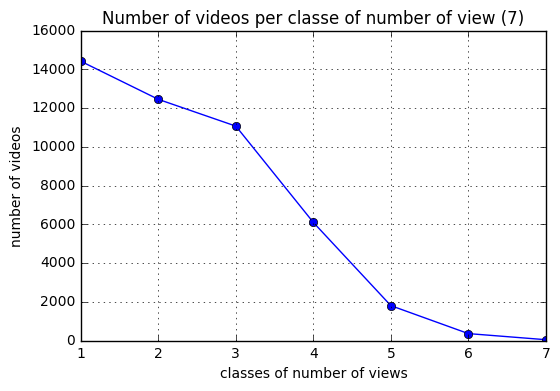

In [5]:
plt.figure(1)
plt.plot([1,2,3,4,5,6,7],nbvid_lab,'b-o')

plt.xlabel('classes of number of views')
plt.ylabel('number of videos')
plt.title('Number of videos per classe of number of view (7)')
plt.grid(True)
plt.show()



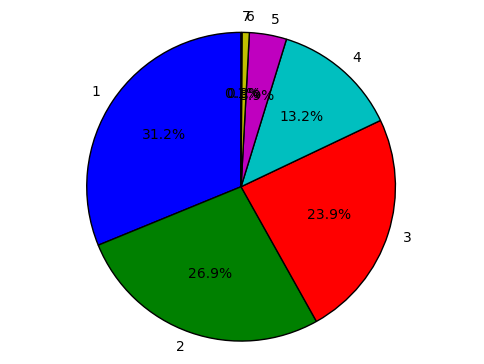

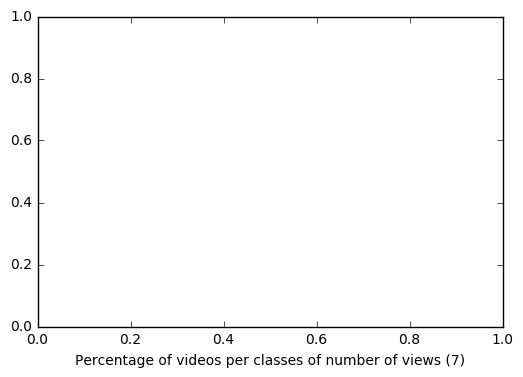

In [6]:
name = ['1','2','3','4','5','6','7']
plt.figure(2)
plt.pie(nbvid_lab,labels=name,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()
plt.xlabel('Percentage of videos per classes of number of views (7)')

**II/ Ratio like-dislike**

In this section, we wanted to see if there was a pattern between the number of views of a video and its ratio like over dislike. The plots below (figures 3 and 4) show that more a video is sawn, smaller the ratio is : from 2500000 views, the ratio does not go above 200, when it can reach 1600 for some videos with a lot less number of views. Moreover, the videos with a ratio smaller than one, which means they have more dislikes than likes, are for the most (except a few number) below 2500000 of views. 

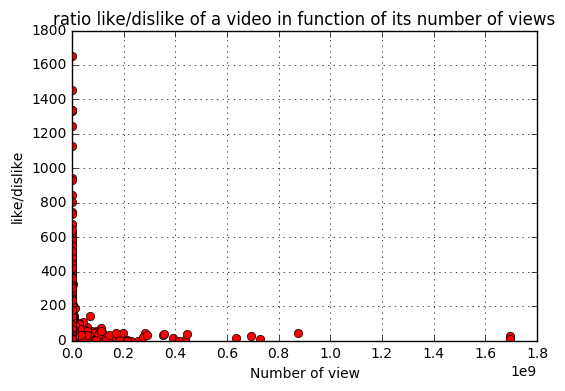

In [7]:
plt.figure(3)
plt.plot(listViewCount,ratio_like_dislike, 'ro')
plt.xlabel('Number of view')
plt.ylabel('like/dislike')
plt.title('ratio like/dislike of a video in function of its number of views')
plt.grid(True)
plt.show()



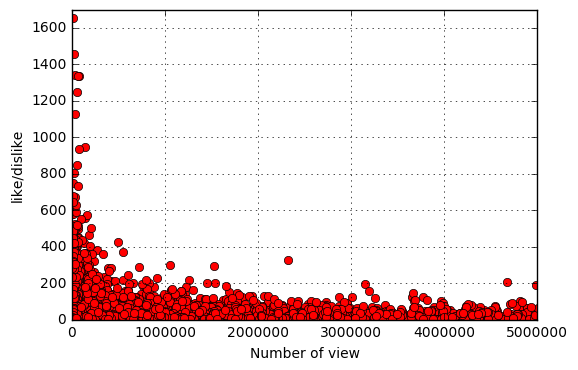

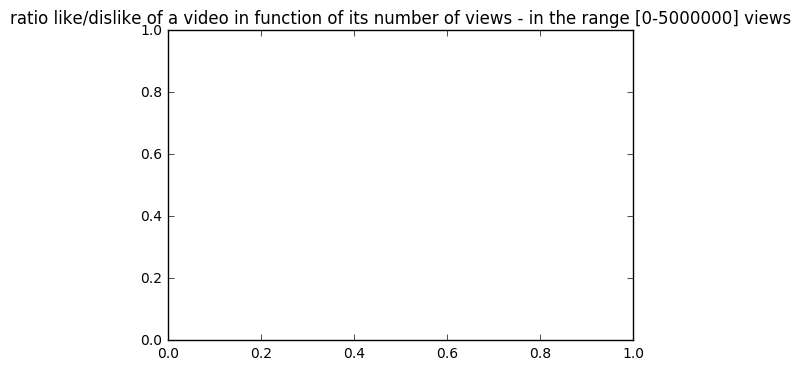

In [8]:
plt.figure(4)
plt.plot(listViewCount,ratio_like_dislike, 'ro')
plt.xlabel('Number of view')
plt.ylabel('like/dislike')
plt.axis([0,0.5e7,0,1700])
plt.grid(True)
plt.show()
plt.title('ratio like/dislike of a video in function of its number of views - in the range [0-5000000] views')

**III/ Comments of a video**

From the plots below (figures 5 and 6) we can see that the number of comments of a video is in the same range, except some videos (with very high number of views): [0,50000] from figure 5, from figure 6, for video with less than 2000000 views, the number of comments is mostly below 3000. It seems from this analysis, that the number of comments is not very dependent of the number of views.

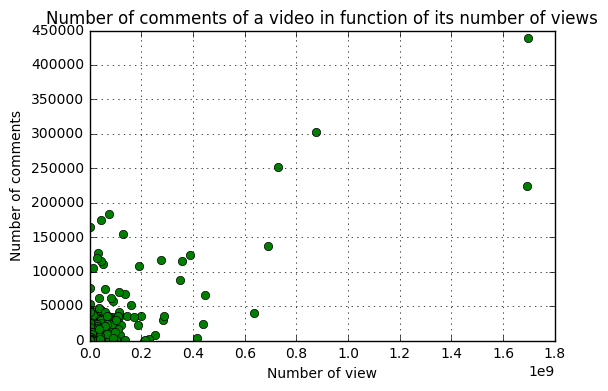

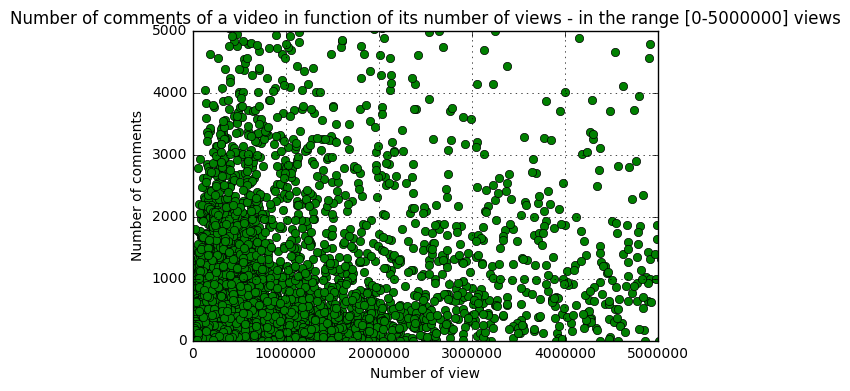

In [9]:
plt.figure(5)
plt.plot(listViewCount,commentCount,'go')
plt.xlabel('Number of view')
plt.ylabel('Number of comments')
plt.title('Number of comments of a video in function of its number of views')
plt.grid(True)
plt.show()

plt.figure(6)
plt.plot(listViewCount,commentCount,'go')
plt.xlabel('Number of view')
plt.ylabel('Number of comments')
plt.title('Number of comments of a video in function of its number of views - in the range [0-5000000] views')
plt.axis([0,0.5e7,0,5000])
plt.grid(True)
plt.show()

**IV/Suscribers**

As for the videos, we created classes of subscribers. Figure 7 and 8 show the number of videos per classes of subscribers. We can see that nearly 50% of the videos belong to the first class of subscribers (channels with less than 999 subscribers). As for the classes number of views, the 3 first classes represent 85% of the database. Most of the channels have less than 99999 subscribers.

In [10]:
nbsubs_lab = np.zeros(nbr_label-1)
for i in range(nbr_video):
    
    subs = int(videos_database['subsCount'][i])

    if subs < 999:
        nbsubs_lab[0]+=1
    elif subs < 9999:
        nbsubs_lab[1]+=1
    elif subs < 99999:
        nbsubs_lab[2]+=1
    elif subs < 999999:
        nbsubs_lab[3]+=1
    elif subs < 9999999:
        nbsubs_lab[4]+=1
    else:
        nbsubs_lab[5]+=1

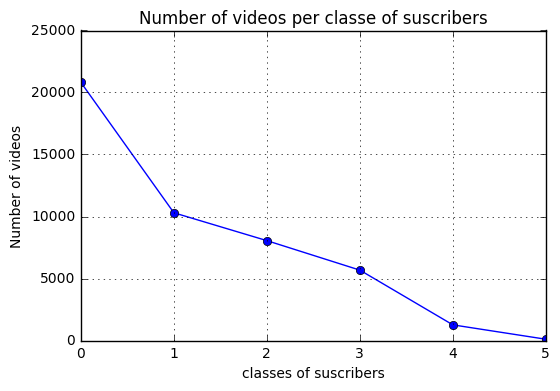

In [11]:
plt.figure(7)
plt.plot(nbsubs_lab,'bo-')
plt.xlabel('classes of suscribers')
plt.ylabel('Number of videos')
plt.title('Number of videos per classe of suscribers')
plt.grid(True)
plt.show()




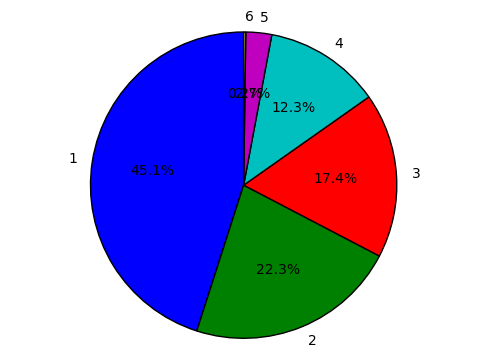

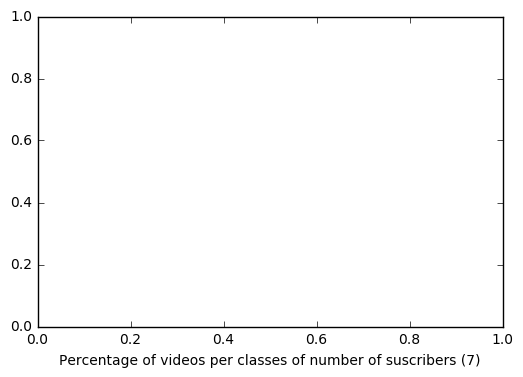

In [12]:
name = ['1','2','3','4','5','6']
plt.figure(8)
plt.pie(nbsubs_lab,labels=name,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()
plt.xlabel('Percentage of videos per classes of number of suscribers (7)')

**V/Ratio views-suscribers**

In this section, we computed the ratio views per subscribers. The mean on the whole database is 4172 views per subscribers. Surprisingly it is the channels with the smallest number of subscribers that have the higher ratio views over subscribers. They does not rest on their subscribers in order to get a lot of views for their videos. Whereas the biggest channels in term of subscribers have the smallest ratio views per subscribers.

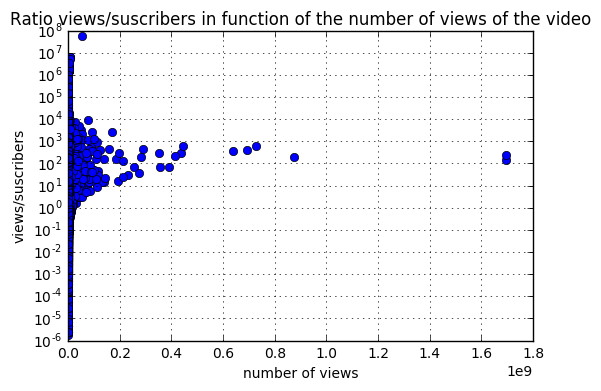

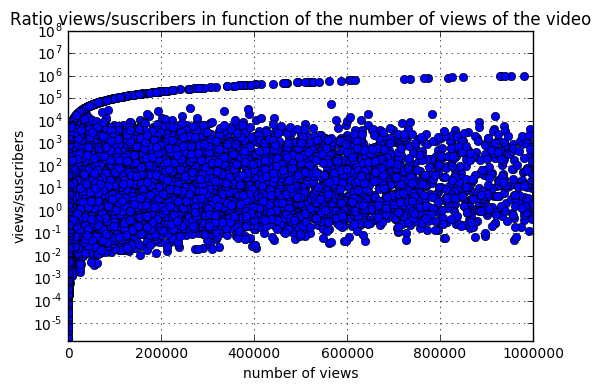

In [13]:
plt.figure(9)
plt.plot(listViewCount,ratio_views_subs,'bo')
plt.xlabel('number of views')
plt.ylabel('views/suscribers')
plt.title('Ratio views/suscribers in function of the number of views of the video')
plt.yscale('log')
plt.grid(True)
plt.show()

plt.figure(10)
plt.plot(listViewCount,ratio_views_subs,'bo')
plt.xlabel('number of views')
plt.ylabel('views/suscribers')
plt.title('Ratio views/suscribers in function of the number of views of the video')
plt.yscale('log')
plt.axis([0,0.01e8,0,1e8])
plt.grid(True)
plt.show()



In [14]:
mean_ratio = np.mean(ratio_views_subs)
print('Mean views/suscribers :',mean_ratio)
ind1=0
ind2=0
ind3=0
ind4=0
ind5=0
ind6=0
ratio_views_subs_sorted = np.sort(ratio_views_subs)
subsCount_sorted = np.sort(subsCount)
for i in range(nbr_video):
    subs = int(subsCount_sorted[i])
    if subs < 999:
        ind1=i
    elif subs < 9999:
        ind2=i
    elif subs < 99999:
        ind3=i
    elif subs < 999999:
        ind4=i
    elif subs < 9999999:
        ind5=i
    else:
        ind6=i

mean_cl1 = np.mean(ratio_views_subs[0:ind1])
mean_cl2 = np.mean(ratio_views_subs[ind1+1:ind2])
mean_cl3 = np.mean(ratio_views_subs[ind2+1:ind3])
mean_cl4 = np.mean(ratio_views_subs[ind3+1:ind4])
mean_cl5 = np.mean(ratio_views_subs[ind4+1:ind5])
mean_cl6 = np.mean(ratio_views_subs[ind5+1:ind6])

print('mean per classes')
print('classe 1',mean_cl1)
print('classe 2',mean_cl2)
print('classe 3',mean_cl3)
print('classe 4',mean_cl4)
print('classe 5',mean_cl5)
print('classe 6',mean_cl6)


Mean views/suscribers : 4172.57114303
mean per classes
classe 1 5895.8842561
classe 2 2230.02328644
classe 3 3742.96662214
classe 4 2733.51303252
classe 5 1016.20645965
classe 6 1785.76192451


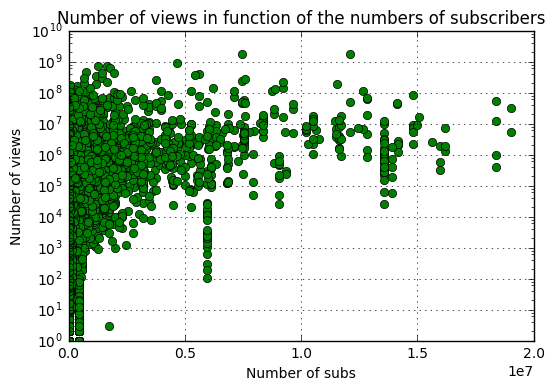

In [15]:
plt.figure(11)
plt.plot(subsCount,listViewCount,'go')
plt.xlabel('Number of subs')
plt.ylabel('Number of views')
plt.grid(True)
plt.title('Number of views in function of the numbers of subscribers')
plt.yscale('log')
plt.show()
